In [ ]:
pip install pandas matplotlib statsmodels


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving time_series_data.csv to time_series_data.csv


Saving time_series_data.csv to time_series_data (5).csv
Missing values in the dataset:
 Value    6
dtype: int64
Missing values after handling:
 Value    0
dtype: int64


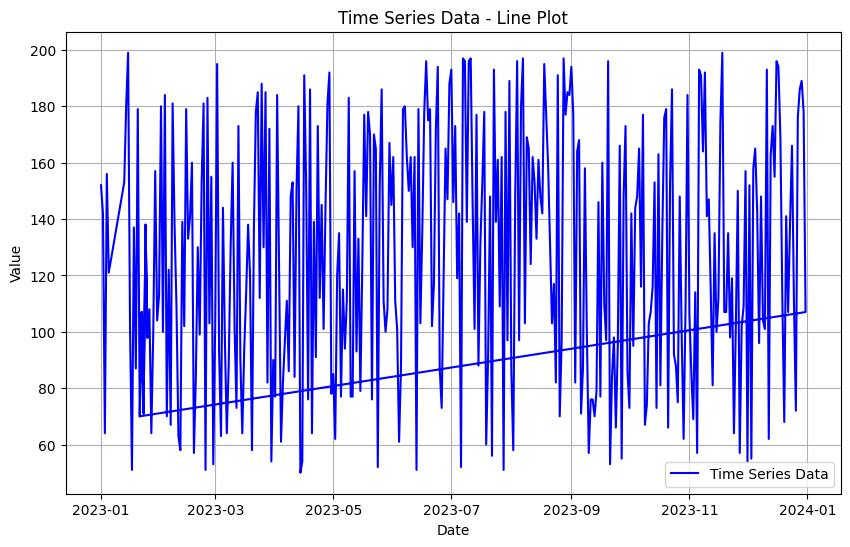

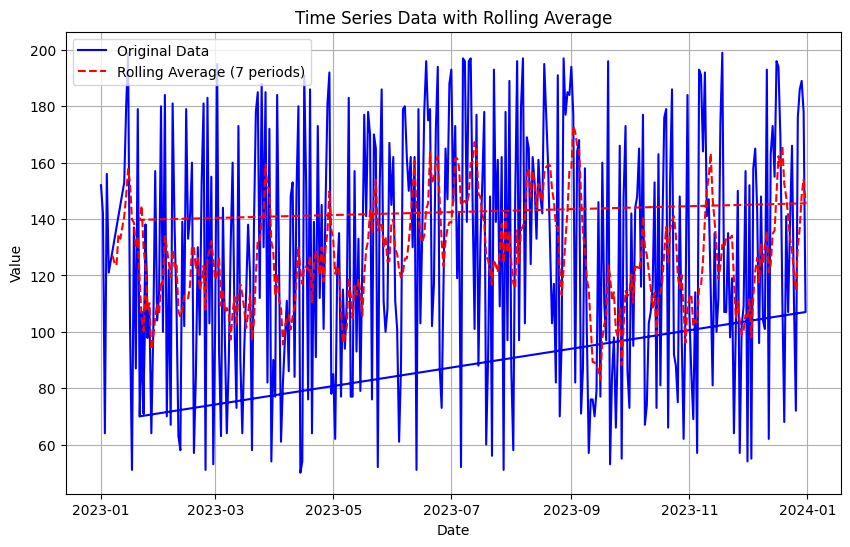

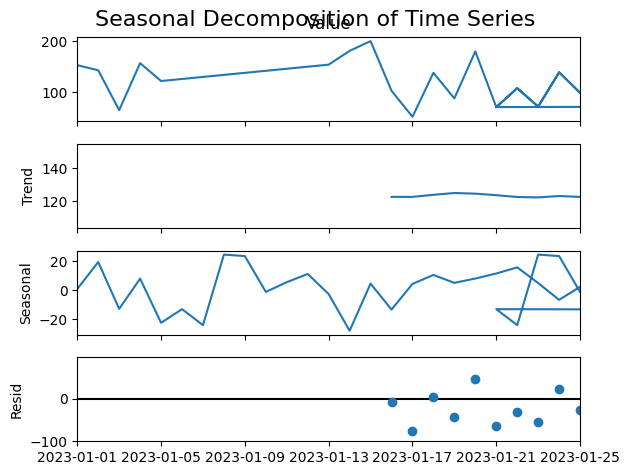

In [ ]:
# Step 1: Upload your CSV file manually
from google.colab import files
uploaded = files.upload()  # This will open the file upload dialog

# After uploading, you can list the uploaded files to confirm the upload
import os
os.listdir()  # List the uploaded files

# Step 2: Load the data into a pandas DataFrame
import pandas as pd

# Replace 'time_series_data.csv' with the name of the file you uploaded
df = pd.read_csv('time_series_data.csv', parse_dates=['Date'], index_col='Date')

# Show the first few rows of the data to confirm it's loaded correctly
df.head()

# Step 3: Handle Missing Data (if any)
print("Missing values in the dataset:\n", df.isnull().sum())

# If there are missing values, you can interpolate them or use forward/backward fill:
df['Value'] = df['Value'].interpolate(method='linear')  # Linear interpolation

# Alternatively, use forward or backward fill:
# df['Value'] = df['Value'].fillna(method='ffill')  # Forward fill
# df['Value'] = df['Value'].fillna(method='bfill')  # Backward fill

# Confirm missing values have been handled
print("Missing values after handling:\n", df.isnull().sum())

# Step 4: Visualizing Time Series Data

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to plot the Time Series Data (Line Plot)
def plot_time_series_line(df, column='Value'):
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df[column], label='Time Series Data', color='b')
    plt.title('Time Series Data - Line Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Rolling Average (Moving Average) of Time Series
def plot_rolling_average(df, column='Value', window=7):
    df['rolling_avg'] = df[column].rolling(window=window).mean()

    plt.figure(figsize=(10,6))
    plt.plot(df.index, df[column], label='Original Data', color='b')
    plt.plot(df.index, df['rolling_avg'], label=f'Rolling Average ({window} periods)', color='r', linestyle='--')
    plt.title('Time Series Data with Rolling Average')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Seasonal Decomposition of Time Series Data
def plot_seasonal_decomposition(df, column='Value', period=30):  # Adjust period as needed
    result = seasonal_decompose(df[column], model='additive', period=period)
    result.plot()
    plt.suptitle('Seasonal Decomposition of Time Series', fontsize=16)
    plt.show()

# Step 5: Run Visualizations
plot_time_series_line(df, 'Value')  # Plot the Line Plot of the data
plot_rolling_average(df, 'Value', window=7)  # Plot Rolling Average with a 7-day window
plot_seasonal_decomposition(df, 'Value', period=30)  # Decompose the time series (assuming monthly seasonality)
